In [1]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout, execute_plot, find_max_train_save

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


In [2]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [9]:
random_runs = [
    "kobybibas/pnml_for_active_learning/2owqsr4v",
    "kobybibas/pnml_for_active_learning/3uv8qkzd",
    "kobybibas/pnml_for_active_learning/1awg0e6d",
    "kobybibas/pnml_for_active_learning/2uz3ccqp",
    "kobybibas/pnml_for_active_learning/nk46a46y",
    "kobybibas/pnml_for_active_learning/fix9x5qh",
]

bald_runs = [
    "kobybibas/pnml_for_active_learning/2ppejidh",
    "kobybibas/pnml_for_active_learning/1if8fe0k",
    "kobybibas/pnml_for_active_learning/2g6lp2nc",
    "kobybibas/pnml_for_active_learning/y8yn0f9e",
    "kobybibas/pnml_for_active_learning/3j1dp6wz",
    "kobybibas/pnml_for_active_learning/5t9zjpie",
]

kmean_runs = [  # KCenterGreedy
    "kobybibas/pnml_for_active_learning/25oljj7j",
    "kobybibas/pnml_for_active_learning/4qktbvny",
    "kobybibas/pnml_for_active_learning/2toukhqc",
    "kobybibas/pnml_for_active_learning/1eywn2fv",
    "kobybibas/pnml_for_active_learning/18vb8gcm",
    "kobybibas/pnml_for_active_learning/duzygmzg",
    "kobybibas/pnml_for_active_learning/2m8l67er",
]

epig_runs = [
    "kobybibas/pnml_for_active_learning/tte1pwkj",
    "kobybibas/pnml_for_active_learning/kzhyh9vs",
    "kobybibas/pnml_for_active_learning/1by57vkr",
    "kobybibas/pnml_for_active_learning/17s779kj",
    "kobybibas/pnml_for_active_learning/ielw939h",
    "kobybibas/pnml_for_active_learning/1z846kyn",
]

pnml_runs = [
    "kobybibas/pnml_for_active_learning/2x8fvajh",
    "kobybibas/pnml_for_active_learning/1ba5a7bz",
    "kobybibas/pnml_for_active_learning/kt71vbv1",
    "kobybibas/pnml_for_active_learning/3fjgpje3",
    "kobybibas/pnml_for_active_learning/14q5whwt",
    "kobybibas/pnml_for_active_learning/3v9pq45l",
]

random_dfs = process_results(api=api, run_list=random_runs)
bald_dfs = process_results(api=api, run_list=bald_runs)
kmean_dfs = process_results(api=api, run_list=kmean_runs)
epig_dfs = process_results(api=api, run_list=epig_runs)
pnml_dfs = process_results(api=api, run_list=pnml_runs)

kobybibas/pnml_for_active_learning/2owqsr4v
kobybibas/pnml_for_active_learning/3uv8qkzd
kobybibas/pnml_for_active_learning/1awg0e6d
kobybibas/pnml_for_active_learning/2uz3ccqp
kobybibas/pnml_for_active_learning/nk46a46y
kobybibas/pnml_for_active_learning/fix9x5qh
kobybibas/pnml_for_active_learning/2ppejidh
kobybibas/pnml_for_active_learning/1if8fe0k
kobybibas/pnml_for_active_learning/2g6lp2nc
kobybibas/pnml_for_active_learning/y8yn0f9e
kobybibas/pnml_for_active_learning/3j1dp6wz
kobybibas/pnml_for_active_learning/5t9zjpie
kobybibas/pnml_for_active_learning/25oljj7j
kobybibas/pnml_for_active_learning/4qktbvny
kobybibas/pnml_for_active_learning/2toukhqc
kobybibas/pnml_for_active_learning/1eywn2fv
kobybibas/pnml_for_active_learning/18vb8gcm
kobybibas/pnml_for_active_learning/duzygmzg
kobybibas/pnml_for_active_learning/2m8l67er
kobybibas/pnml_for_active_learning/tte1pwkj
kobybibas/pnml_for_active_learning/kzhyh9vs
kobybibas/pnml_for_active_learning/1by57vkr
kobybibas/pnml_for_active_learni

In [10]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs, rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs, rolling_size=rolling_size)
kmean_res = execute_df_rollout(kmean_dfs, rolling_size=rolling_size)
epig_res = execute_df_rollout(epig_dfs, rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs, rolling_size=rolling_size)
plot_list = [
    (random_res, "Random"),
    (bald_res, "Bald"),
    (kmean_res, "Core-set"),
    (epig_res,"EPIG"),
    (pnml_res, "DIAL"),
]

In [11]:
row = find_max_train_save(pnml_res, bald_res)
print(100 * row.training_set_size_left / row.training_set_size_right)
print(row)

78.17589576547232
training_set_size_left     240.000000
test_acc_left                0.957284
test_acc_round               0.957000
training_set_size_right    307.000000
test_acc_right               0.957497
Name: 654, dtype: float64


Random
Bald
Core-set
{'mean': training_set_size
10          NaN
11          NaN
12          NaN
13          NaN
14     0.514523
         ...   
305    0.948987
306    0.949767
307    0.949740
308    0.950447
309    0.951040
Name: test_acc, Length: 300, dtype: float64, 'low': training_set_size
10          NaN
11          NaN
12          NaN
13          NaN
14     0.538719
         ...   
305    0.973183
306    0.973963
307    0.973936
308    0.974643
309    0.975236
Name: test_acc, Length: 300, dtype: float64, 'high': training_set_size
10          NaN
11          NaN
12          NaN
13          NaN
14     0.490327
         ...   
305    0.924791
306    0.925571
307    0.925544
308    0.926251
309    0.926844
Name: test_acc, Length: 300, dtype: float64}


TypeError: string indices must be integers

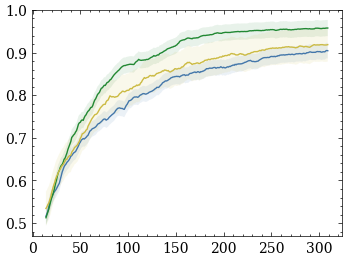

In [12]:
plt.style.use(["science", "bright", "no-latex"])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig, ax = execute_plot(plot_list, fig, ax)
ax.get_legend().remove()
print("MNIST OOD")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "mnist_ood.pdf"))
plt.show()

In [ ]:
eps = 0.01
acc_values = [0.85, 0.75, 0.65]
for dict_df, method in plot_list:
    print(method)
    df = dict_df["mean"]

    for acc in acc_values:
        print(f"{acc}\t {df[(df > acc - eps ) & (df <= acc )].index[0]}")

Random
0.85	 145
0.75	 73
0.65	 36
Bald
0.85	 83
0.75	 51
0.65	 32
Core-set
0.85	 117
0.75	 61
0.65	 33
DIAL
0.85	 73
0.75	 48
0.65	 30
